<a href="https://colab.research.google.com/github/HamedTabkhi/Intro-to-ML/blob/main/CancerDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Download the Breast Cancer dataset from UCI
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data -O CancerData.csv

# Load it
import pandas as pd

# Define column names based on the dataset information
column_names = ['ID', 'Diagnosis'] + [f'feature_{i}' for i in range(1, 31)]
cancer_data = pd.read_csv('CancerData.csv', header=None, names=column_names)

# Drop ID column (not needed for analysis)
cancer_data = cancer_data.drop(columns=['ID'])

# Verify the data
print(cancer_data.head())


--2024-11-02 15:39:35--  https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘CancerData.csv’

CancerData.csv          [ <=>                ] 121.19K  --.-KB/s    in 0.08s   

2024-11-02 15:39:36 (1.46 MB/s) - ‘CancerData.csv’ saved [124103]

  Diagnosis  feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0         M      17.99      10.38     122.80     1001.0    0.11840    0.27760   
1         M      20.57      17.77     132.90     1326.0    0.08474    0.07864   
2         M      19.69      21.25     130.00     1203.0    0.10960    0.15990   
3         M      11.42      20.38      77.58      386.1    0.14250    0.28390   
4         M      20.29      14.34     135.10     1297.0    0.10030    0.13

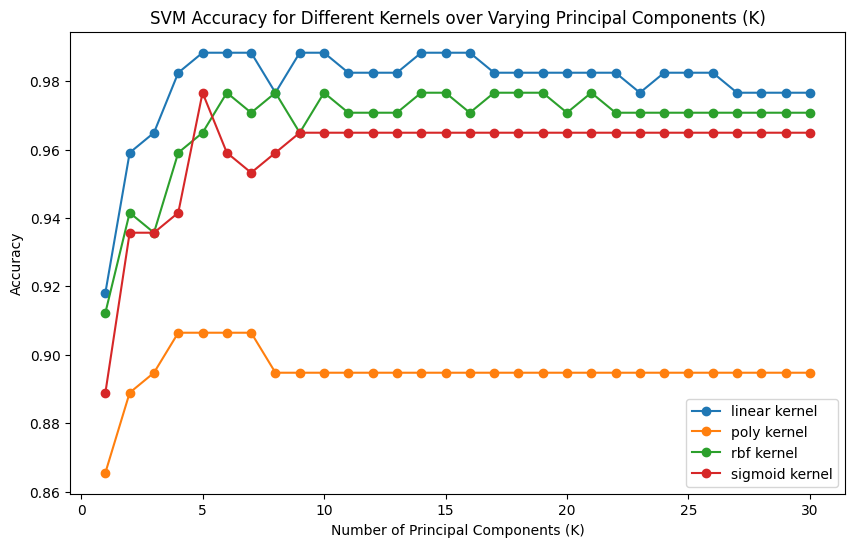

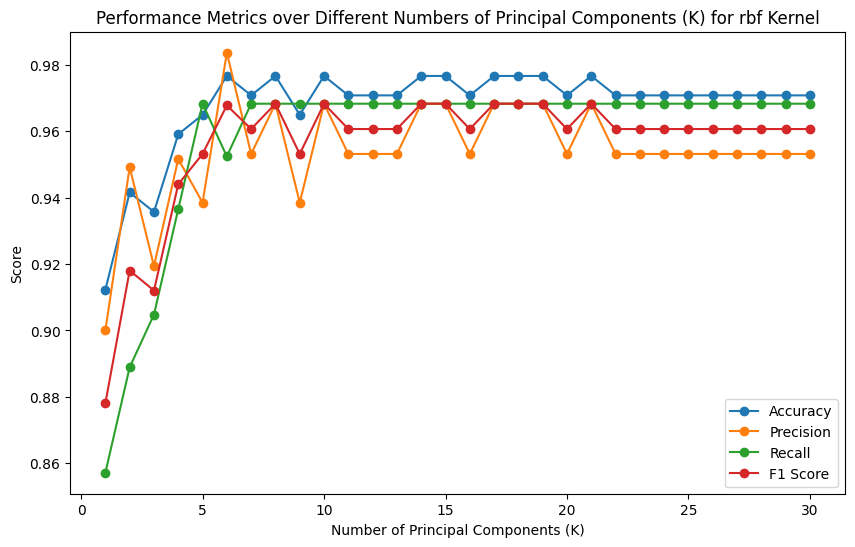

In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Define features and target variable
X = cancer_data.drop(columns=["Diagnosis"])
y = cancer_data["Diagnosis"]

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Plot SVM Accuracy for Different Kernels
def plot_accuracy_for_kernels(X_train, X_test, y_train, y_test, kernels=['linear', 'poly', 'rbf', 'sigmoid']):
    max_components = X_train.shape[1]
    kernel_accuracies = {}

    for kernel in kernels:
        accuracies = []
        for n_components in range(1, max_components + 1):
            pca = PCA(n_components=n_components)
            X_train_pca = pca.fit_transform(X_train)
            X_test_pca = pca.transform(X_test)

            svm = SVC(kernel=kernel)
            svm.fit(X_train_pca, y_train)
            y_pred = svm.predict(X_test_pca)

            accuracies.append(accuracy_score(y_test, y_pred))

        kernel_accuracies[kernel] = accuracies

    plt.figure(figsize=(10, 6))
    for kernel, accuracies in kernel_accuracies.items():
        plt.plot(range(1, max_components + 1), accuracies, label=f"{kernel} kernel", marker='o')

    plt.xlabel("Number of Principal Components (K)")
    plt.ylabel("Accuracy")
    plt.title("SVM Accuracy for Different Kernels over Varying Principal Components (K)")
    plt.legend()
    plt.show()

# Run the plot for kernel accuracies
plot_accuracy_for_kernels(X_train, X_test, y_train, y_test)

# Plot Performance Metrics for Best Kernel
def plot_performance_metrics(X_train, X_test, y_train, y_test, best_kernel='rbf'):
    max_components = X_train.shape[1]
    accuracies, precisions, recalls, f1_scores = [], [], [], []

    for n_components in range(1, max_components + 1):
        pca = PCA(n_components=n_components)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)

        svm = SVC(kernel=best_kernel)
        svm.fit(X_train_pca, y_train)
        y_pred = svm.predict(X_test_pca)

        accuracies.append(accuracy_score(y_test, y_pred))
        precisions.append(precision_score(y_test, y_pred, pos_label='M'))
        recalls.append(recall_score(y_test, y_pred, pos_label='M'))
        f1_scores.append(f1_score(y_test, y_pred, pos_label='M'))

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_components + 1), accuracies, label="Accuracy", marker='o')
    plt.plot(range(1, max_components + 1), precisions, label="Precision", marker='o')
    plt.plot(range(1, max_components + 1), recalls, label="Recall", marker='o')
    plt.plot(range(1, max_components + 1), f1_scores, label="F1 Score", marker='o')

    plt.xlabel("Number of Principal Components (K)")
    plt.ylabel("Score")
    plt.title(f"Performance Metrics over Different Numbers of Principal Components (K) for {best_kernel} Kernel")
    plt.legend()
    plt.show()

# Run the plot for performance metrics for the best kernel
plot_performance_metrics(X_train, X_test, y_train, y_test, best_kernel='rbf')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/homework4


 CancerDataset.ipynb  'Housing (1).csv'


In [42]:
from google.colab import files
uploaded = files.upload()




Saving Housing.csv to Housing.csv


Saving Housing.csv to Housing (5).csv


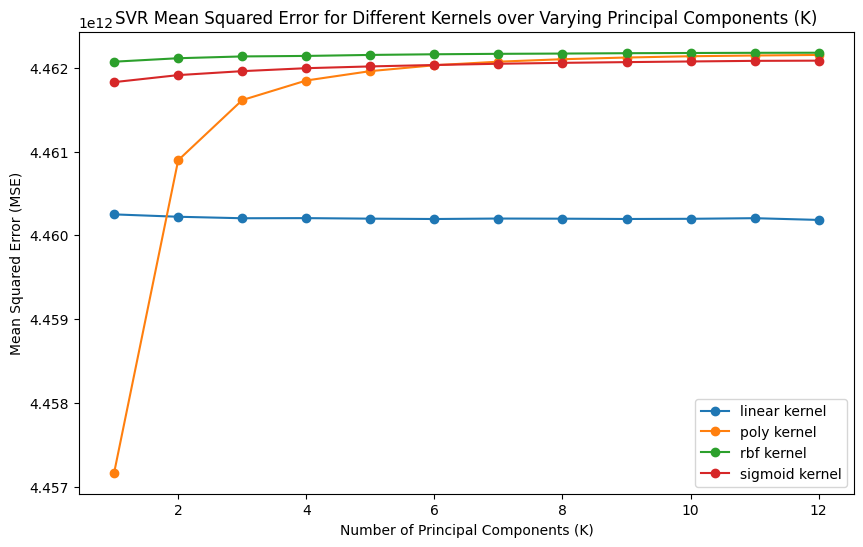

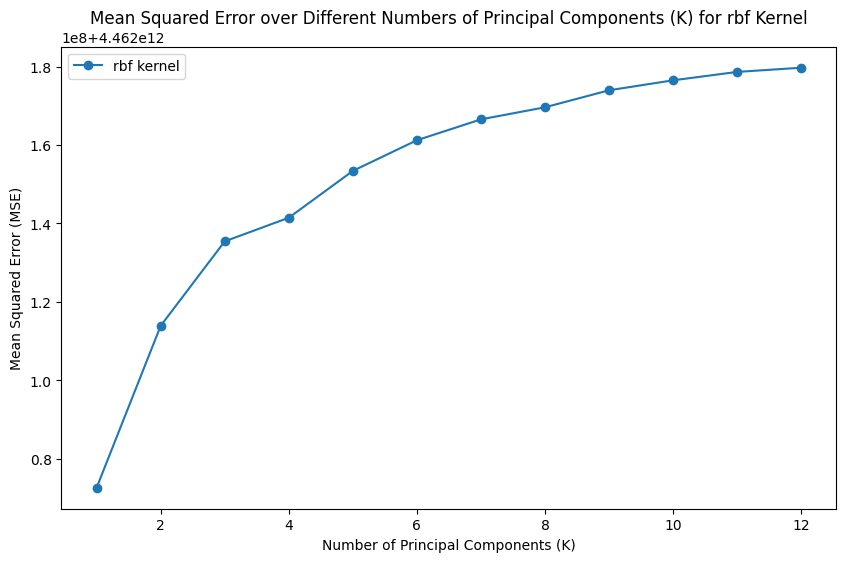

In [57]:
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

# Step 1: Upload the file manually
uploaded = files.upload()

# Step 2: Load the dataset
housing_data = pd.read_csv('Housing.csv')  # Replace 'Housing.csv' with the exact file name

# Step 3: Encode categorical variables
# Convert categorical columns to numeric format
for column in housing_data.select_dtypes(include=['object']).columns:
    label_encoder = LabelEncoder()
    housing_data[column] = label_encoder.fit_transform(housing_data[column])

# Step 4: Define features (X) and target (y)
X = housing_data.drop(columns=['price'])  # Replace 'price' with the actual target column if different
y = housing_data['price']  # Replace 'price' if necessary

# Step 5: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Function to plot MSE for different kernels
def plot_mse_for_kernels(X_train, X_test, y_train, y_test, kernels=['linear', 'poly', 'rbf', 'sigmoid']):
    max_components = X_train.shape[1]
    kernel_mse = {}

    for kernel in kernels:
        mse_values = []
        for n_components in range(1, max_components + 1):
            # Apply PCA
            pca = PCA(n_components=n_components)
            X_train_pca = pca.fit_transform(X_train)
            X_test_pca = pca.transform(X_test)

            # Train SVR with specified kernel
            svr = SVR(kernel=kernel)
            svr.fit(X_train_pca, y_train)
            y_pred = svr.predict(X_test_pca)

            # Calculate MSE
            mse = mean_squared_error(y_test, y_pred)
            mse_values.append(mse)

        kernel_mse[kernel] = mse_values

    # Plot MSE for each kernel over different numbers of principal components
    plt.figure(figsize=(10, 6))
    for kernel, mse_values in kernel_mse.items():
        plt.plot(range(1, max_components + 1), mse_values, label=f"{kernel} kernel", marker='o')

    plt.xlabel("Number of Principal Components (K)")
    plt.ylabel("Mean Squared Error (MSE)")
    plt.title("SVR Mean Squared Error for Different Kernels over Varying Principal Components (K)")
    plt.legend()
    plt.show()

# Function to plot MSE for the best kernel
def plot_best_kernel_mse(X_train, X_test, y_train, y_test, best_kernel='rbf'):
    max_components = X_train.shape[1]
    mse_values = []

    for n_components in range(1, max_components + 1):
        # Apply PCA
        pca = PCA(n_components=n_components)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)

        # Train SVR with best kernel
        svr = SVR(kernel=best_kernel)
        svr.fit(X_train_pca, y_train)
        y_pred = svr.predict(X_test_pca)

        # Calculate MSE
        mse = mean_squared_error(y_test, y_pred)
        mse_values.append(mse)

    # Plot MSE for the best kernel over varying principal components
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_components + 1), mse_values, label=f"{best_kernel} kernel", marker='o')
    plt.xlabel("Number of Principal Components (K)")
    plt.ylabel("Mean Squared Error (MSE)")
    plt.title(f"Mean Squared Error over Different Numbers of Principal Components (K) for {best_kernel} Kernel")
    plt.legend()
    plt.show()

# Run the plot for MSE across different kernels
plot_mse_for_kernels(X_train, X_test, y_train, y_test)

# Run the plot for MSE with the best kernel (you can specify the kernel that performed best)
plot_best_kernel_mse(X_train, X_test, y_train, y_test, best_kernel='rbf')
